# Show data as RGB images

This section demonstrates how to show data from the datacube as red-green-blue (RGB) images. RGB images are also known as 'true-colour' images; they are rendered using the image's 'natural' colours and appear how they might be seen by the human eye.

Plotting RGB images requires data to be loaded. The data loading steps are shown in the **Recap: Load data** section below. Alternatively, a more detailed process can be found in the previous document, **Loading data from Digital Earth Africa**.

If you are directly following on from **Loading data from Digital Earth Africa** and have already loaded the data, you can skip the recap and go straight to the **`rgb` function syntax** section of this document.

## Recap: Load data

In [1]:
import datacube

# Import utilities
import sys
sys.path.append('../../Scripts')

In [2]:
dc = datacube.Datacube(app="Loading_data")

In [3]:
from deafrica_datahandling import load_ard

In [4]:
# Dar es Salaam, Tanzania - 2018
query = dict(dc=dc,
             min_gooddata=0.7,
             x=(39.20, 39.37),
             y=(-6.90, -6.70),
             time=("2018-01-01", "2018-12-31"),
             output_crs="EPSG:4326",
             resolution=(-0.00027, 0.00027),
             group_by='solar_day')

In [5]:
landsat_ds = load_ard(products=["ls7_usgs_sr_scene", "ls8_usgs_sr_scene"],
                      **query)

Using pixel quality parameters for USGS Collection 1
Finding datasets
    ls7_usgs_sr_scene
    ls8_usgs_sr_scene
Counting good quality pixels for each time step
Filtering to 4 out of 41 time steps with at least 70.0% good quality pixels
Applying pixel quality/cloud mask
Loading 4 time steps


## `rgb` function syntax

We will use the `rgb` function to produce RGB images. First, we have to import the function from the DE Africa utilities. The `rgb()` function has three main arguments, `ds`, `bands` and `index`.

In [6]:
from deafrica_plotting import rgb

|Compulsory arguments| Description | Example|
|----------|----------------|-------|
| `ds` | The 2D `xarray` data to show. A 2D dataset (with dimensions *x/latitude* and *y/longitude*) can be derived from a 3D dataset (with *time* as the third dimension) by selecting a single timestep; this is done using the `index` option described below. | `ds=landsat_ds`|
| `bands`| A list of the names of the data variables in `ds` to use as the red, green, and blue channels (in that order) in the RGB image.  | `bands=['red', 'green', 'blue']`|
|`index`|The timestep to view; default is `0`. The Python language counts from 0, so `index=0` shows the first timestep, and `index=1` the second timestep. | `index=3` ||

You can see how many timesteps an `xarray.DataArray` or `xarray.DataSet` contains by typing the name of the `DataArray` or `DataSet` in a code cell and executing it. This is covered in more detail in **Loading data from Digital Earth Africa**. Look for the dimension labelled **time**; it indicates the number of timesteps in the data. Below dimensions are the data variables, such as the names of the bands. In this particular Landsat dataset, the red, green and blue bands are conveniently named `'red'`, `'green'` and `'blue'`, but this might not always be the case.

`rgb` also has several optional arguments.

|Optional arguments| Description | Example|
|----------|----------------|-------|
| `percentile_stretch` | A 2-tuple of floats in ascending order in the range \[0, 1\] which specify the lower and upper percentiles of the colour channel data to set to the minimum and maximum intensities in the image. If most of the image appears too dark, try decreasing the upper percentile (second value). If most of the image appears too bright, try increasing the lower percentile (first value). | `percentile_stretch=(0.3, 0.98)`|
| `size`| The height of the figure. The larger `size` is, the larger the image will be. The default value is 6. | `size=10`|
| `vmin`, `vmax` | Manually sets the minimum and maximum values for colour intensities in the RGB image. | `vmin=0, vmax=2000`|
|`savefig_path`| Exports a copy of the RGB image to the specified path. For example, specifying `'example.png'` will create a PNG image of the RGB plot called `example` in the same directory as the notebook the code was executed in. By default, `rgb` does not export an image. | `savefig_path='example.png'` ||


There is more information about `rgb` in the notebook `04_Plotting.ipynb` in the **Beginners_guide** folder of the Sandbox (GitHub version [here](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks/blob/master/Beginners_guide/04_Plotting.ipynb)). 

It includes details on how to extract single timesteps from the dataset using the more versatile `sel()` and `isel()` commands, which are not covered here. We will also learn about creating a time composite (or 'mosaic') of a 3D `xarray` in Session 3. For now, the `index` argument in `rgb` performs the function of extracting a single timestep.

By default, `rgb` will generate images using `xarray.plot.imshow()`. This is only important if you are trying to modify other, more advanced, features of the plot. `xarray.plot.imshow()` documentation can be found [here](http://xarray.pydata.org/en/v0.10.3/generated/xarray.plot.imshow.html).

## Plot RGB images

We can now put together our `rgb` arguments into the function, and execute the code to generate RBG images.

Below are RGB images of the Landsat data near particular times. The white pixels are locations of missing or unclean data. In the case of Landsat data loaded with `load_ard`, these areas are usually clouds or cloud shadow.

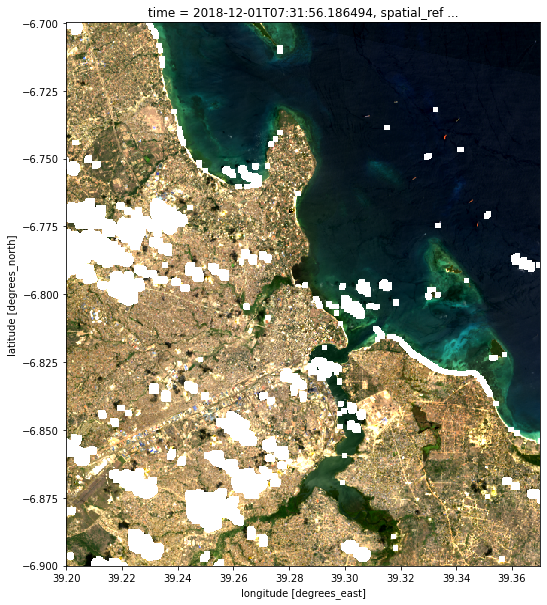

In [13]:
rgb(landsat_ds, bands=['red', 'green', 'blue'], index=3,  
    size=10)

If the above image is considered to be too dark, too bright, or to not have enough contrast, the `percentile_stretch` argument can be used. Here, the lower percentile (first value) of `percentile_stretch` is increased from the default of `0.02` to `0.3` to darken the image and increase the contrast. The upper percentile (second value) is still the default of `0.98`.

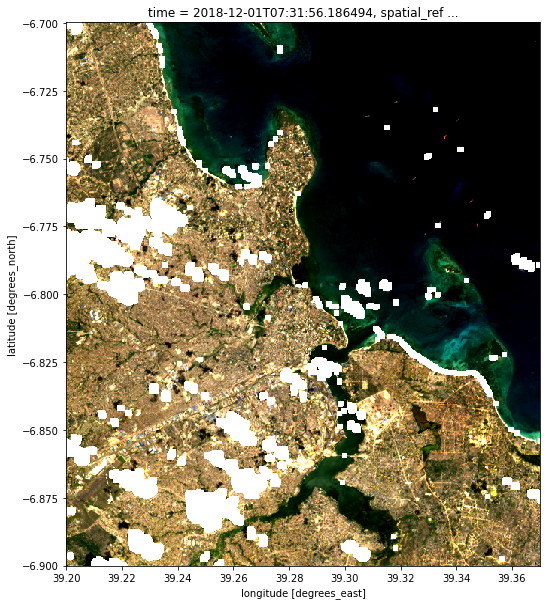

In [14]:
rgb(landsat_ds, bands=['red', 'green', 'blue'], index=3, 
    percentile_stretch=(0.3, 0.98), size=10)

It is sometimes better to manually set the minimum and maximum values that correspond to the minimum and maximum intensities in the RGB image, such as when comparing images of the same area at different times. The `vmin` and `vmax` arguments set these minimum and maximum values.

The range of Landsat data is \[0, 10000\], but for this particular data, most values are in the range \[0, 2000\].

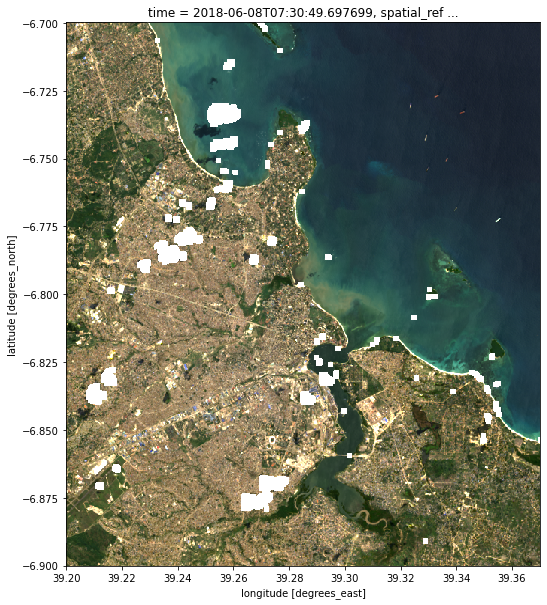

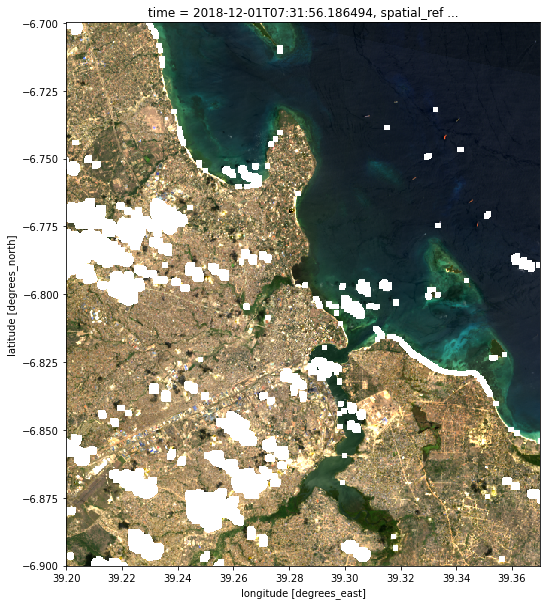

In [16]:
rgb(landsat_ds, bands=['red', 'green', 'blue'], index=1, 
    vmin=0, vmax=2000, size=10)
rgb(landsat_ds, bands=['red', 'green', 'blue'], index=3, 
    vmin=0, vmax=2000, size=10)

Because we set the `vmin` and `vmax` to be the same for both images, we can see that the second image, from 2018-12-01, was likely taken at a higher tide than the first image from 2018-06-08, as the water near the coastline is a deeper colour.

## Try it yourself: Sentinel-2 RGB image

**Loading data from Digital Earth Africa** showed you how to load Sentinel-2 data for the same time and place as the Landsat dataset used above.

Try:

1. Loading the Sentinel-2 data using `load_ard()`
2. Using `rgb()` to plot an RGB image of the Sentinel-2 data
3. Changing the `index` argument to see images from different timesteps, remembering that `index=0` shows the first timestep

Do they look like the Landsat-based images?